# Pymaceuticals Inc.
---

## Analysis Summary

Pymaceuticals, Inc. has began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer. The company's most recent study identified 249 mice with SCC tumors and administered treatment with a range of drug regimens. Tumor development was observed and measured over the course of 45 days. The purpose of the study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens. The aim of this analysis is to clean, format and analyse the full dataset from the clinical study, and generate all of the tables and figures needed for the technical report. A top-level summary of the study results is also provided below.


## Summary of Study Results
- Capomulin was shown to have the second lowest values for Mean and Median Tumor Volume, while Ramicane was the lowest. Similarly, Ramicane has the lowest values for Variance, Standard Deviation from the mean and Standard Error, with Capomulin a very close second.
- Capomulin and Ramicane were observed to have the greatest number of Timepoints. This could indicate more notiable changes in Tumor Volume and therefore more timepoints being recorded for these, which would begin to indicate better performance if the number of Mouse ID's were equal across treatment regimens. However, since there are more Mouse ID's for both Capomulin and Ramicane, this figure is not useful. It is recommended that this figure is removed from the final report, and instead simply the number of Mouse ID's studied under each drug regimen be shown.
- The Box Plot is seen to be the most useful figure to show the results of the study. Infubinol and Ceftamin show much higher median values, higher upper and lower bounds, and larger IQR's for Final Tumor Volume, compared to Capomulin and Ramicane. This indicates that Infubinol and Ceftamin are significantly less effective than Capomulin and Ramicane, firstly because they are simply less effective at reducing tumor volume, but also because there is much more variability around the median value. Capomulin and Ramicane have much lower median values and smaller IQR's, with Capomulin showing the smallest IQR and therefore indicating the best performance of all the treatments. However, Ramicane is also a strong competitor and should not be discounted.
- Looking at the results of Tumor Volume by Timepoint for a single mouse does paint a useful picture and shows the definite decrease over time with the administration of the drug. More useful, however, may be to look at the same relationship grouped by Timepoint and averaged across Tumor Volume, and show this for each drug regimen for comparison.
- In general it looks like heavier mice have larger tumor volumes. This relationship is strongly correlated, with an R-value of 0.84. This is not surprising, however, it is also not a very useful finding without additional information.

## Description of Data errors
- Mouse ID "g989" was found to have different values for the same timepoints. This indicates an error in data collection/capture, and it is not possible to determine which tumor volume values are correct. Therefore all records with this ID have been removed from the study. The analysis was conducted with 248 Mouse ID's.

## Recommendations for further analysis
- More in-depth analysis is required to look at the difference in treatment regimen and effectiveness between Male and Female mice.
- More detailed analysis is required to look at the starting tumor volume for all mice, to ensure they are more or less the same size on average across the mice allocated to each different treatment regimen. This would help to remove bias, ensuring that the study was fair in terms of the starting tumor size and therefore the relative reduction of tumor size over time for each treatment regimen.

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pharm_merged_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

# Display the data table for preview
pharm_merged_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [21]:
# Checking the number of mice.
pharm_merged_df["Mouse ID"].nunique()

249

In [22]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = pharm_merged_df.loc[pharm_merged_df.duplicated(['Mouse ID','Timepoint'])]["Mouse ID"].unique()
duplicate_ID

array(['g989'], dtype=object)

In [23]:
# Optional: Get all the data for the duplicate mouse ID. 
pharm_merged_df[pharm_merged_df["Mouse ID"] == 'g989']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = pharm_merged_df.loc[pharm_merged_df["Mouse ID"] != duplicate_ID[0]]
clean_mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df['Mouse ID'].nunique()

248

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tvol_mean = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tvol_median = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tvol_var = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tvol_stddev = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tvol_stderr = clean_mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tvol_df = pd.DataFrame({
    'Mean Tumor Volume': tvol_mean,
    'Median Tumor Volume': tvol_median,
    'Tumor Volume Variance': tvol_var,
    'Tumor Volume Std. Dev.': tvol_stddev,
    'Tumor Volume Std. Err.': tvol_stderr,
})
tvol_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

tvol_agg_df = clean_mouse_df.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(['mean', 'median', 'var', 'std', 'sem'])
tvol_agg_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

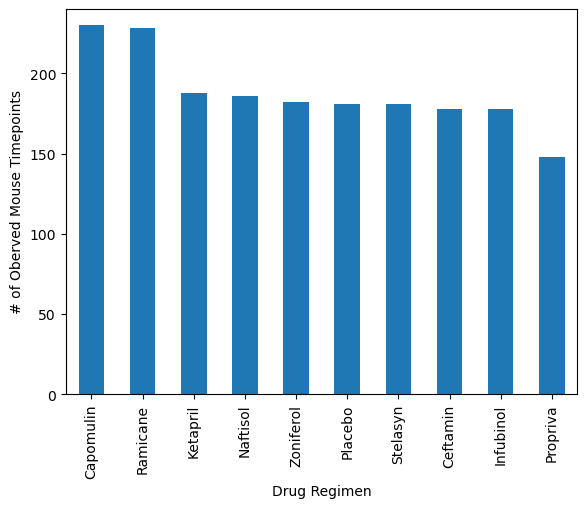

In [28]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoint_counts = clean_mouse_df.groupby(["Drug Regimen"])["Timepoint"].count()
sorted_counts = timepoint_counts.sort_values(ascending=False)

mouse_bar = sorted_counts.plot(kind="bar", figsize=(6.6,5))
mouse_bar.set_xlabel("Drug Regimen")
mouse_bar.set_ylabel("# of Oberved Mouse Timepoints")
mouse_bar.set_ylim(0, max(sorted_counts)+10)
mouse_bar.set_xlim(-0.5, len(sorted_counts)-0.5)
ticks = sorted_counts.index
mouse_bar.set_xticklabels(ticks, rotation="vertical")

plt.show()

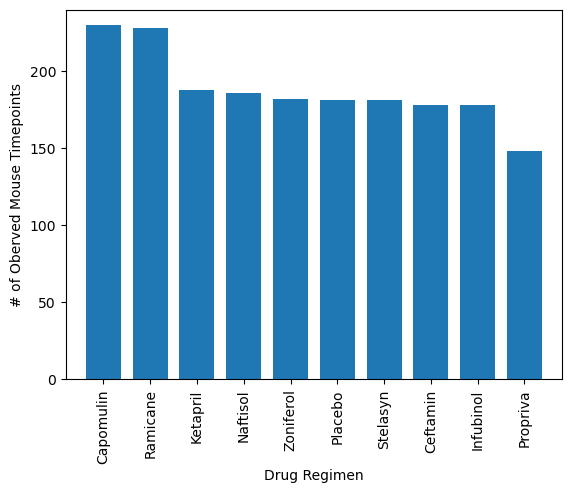

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

timepoint_counts = clean_mouse_df.groupby(["Drug Regimen"])["Timepoint"].count()
sorted_counts = timepoint_counts.sort_values(ascending=False)

x_axis = np.arange(0, len(sorted_counts))

plt.bar(x_axis, sorted_counts, width=0.75)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Oberved Mouse Timepoints")
plt.ylim(0, max(sorted_counts)+10)
plt.xlim(-0.8, len(sorted_counts)-0.2)
ticks = sorted_counts.index
plt.xticks(x_axis, ticks, rotation="vertical")

plt.show()

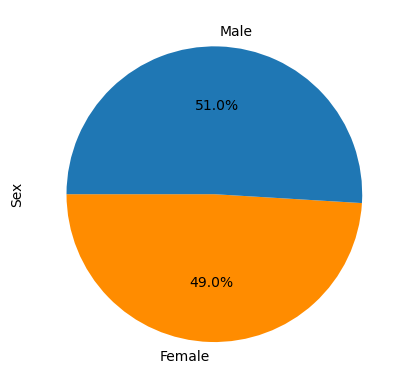

In [30]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

mouse_sex = clean_mouse_df.groupby(["Sex"])["Sex"].count()
mouse_pie = mouse_sex.plot(kind="pie", startangle=180, autopct="%0.1f%%", colors=["DarkOrange", "#1f77b4"], label="Sex")
plt.show()

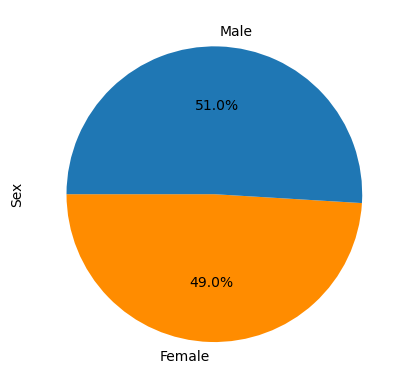

In [31]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_sex, startangle=180, autopct="%1.1f%%", colors=["DarkOrange", "#1f77b4"], labels=["Female", "Male"])
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [32]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = clean_mouse_df.groupby(["Mouse ID", "Drug Regimen"])["Timepoint"].max().to_frame().reset_index()

# Filter for the drugs in the treatment list
max_timepoints_select = max_timepoints[max_timepoints["Drug Regimen"].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]
max_timepoints_select

,Mouse ID,Drug Regimen,Timepoint
0,a203,Infubinol,45
1,a251,Infubinol,45
3,a275,Ceftamin,45
6,a411,Ramicane,45
7,a444,Ramicane,45
...,...,...,...
238,y769,Ceftamin,45
239,y793,Capomulin,45
240,y865,Ceftamin,45
244,z578,Ramicane,45


In [33]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoints_merged = pd.merge(max_timepoints_select, pharm_merged_df, on=["Mouse ID", "Drug Regimen"], how="left")

# Filter for the max timepoint value only
max_timepoints_clean = max_timepoints_merged.loc[max_timepoints_merged["Timepoint_x"] == max_timepoints_merged["Timepoint_y"]].drop(columns=["Timepoint_y"]).rename(columns={"Timepoint_x": "Timepoint"}).reset_index(drop=True)
max_timepoints_clean

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,Infubinol,45,67.973419,2,Female,20,23
1,a251,Infubinol,45,65.525743,1,Female,21,25
2,a275,Ceftamin,45,62.999356,3,Female,20,28
3,a411,Ramicane,45,38.407618,1,Male,3,22
4,a444,Ramicane,45,43.047543,0,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,Ceftamin,45,68.594745,4,Female,6,27
96,y793,Capomulin,45,31.896238,2,Male,17,17
97,y865,Ceftamin,45,64.729837,3,Male,23,26
98,z578,Ramicane,45,30.638696,0,Male,11,16


In [34]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)

t_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

for treatment in treatment_list:
    treatment_t_vol = max_timepoints_clean.loc[max_timepoints_clean["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    t_vol_data.append({treatment: treatment_t_vol})
    quartiles = treatment_t_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = treatment_t_vol[(treatment_t_vol > upper_bound) | (treatment_t_vol < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}") 
    
capomulin = t_vol_data[0]["Capomulin"]
ramicane = t_vol_data[1]["Ramicane"]
infubinol = t_vol_data[2]["Infubinol"]
ceftamin = t_vol_data[3]["Ceftamin"]

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


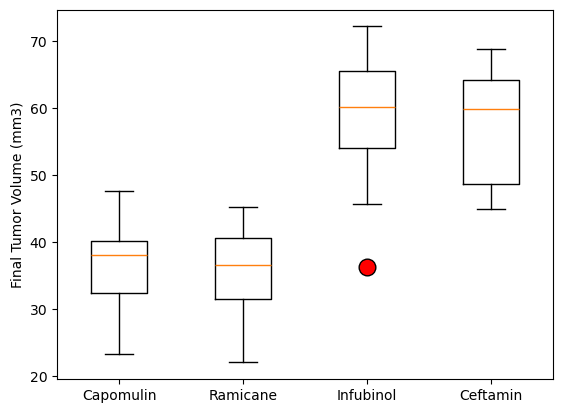

In [35]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()

positions = [1,2, 3, 4]

ax.boxplot([capomulin, ramicane, infubinol, ceftamin], positions=positions, flierprops=dict(marker="o", markerfacecolor="r", markersize="12"))                                                                                        
ax.set_xticklabels(treatment_list)
ax.set_ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

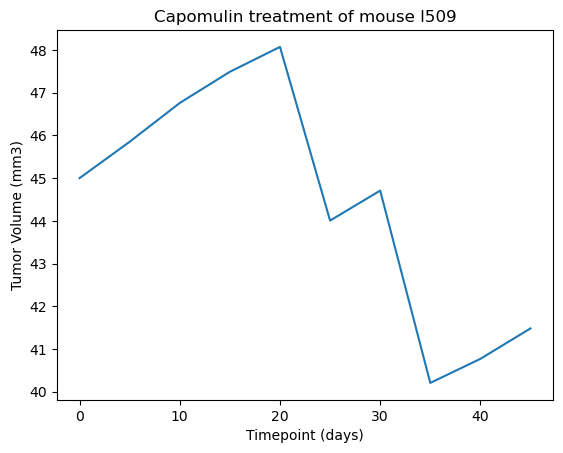

In [36]:
# Filter for Capomulin and mouse ID l509
cap_tvol_vs_time_l509 = clean_mouse_df.loc[(clean_mouse_df['Drug Regimen'] == 'Capomulin') & (clean_mouse_df['Mouse ID'] == "l509"), ['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]

# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

plt.plot(cap_tvol_vs_time_l509["Timepoint"], cap_tvol_vs_time_l509["Tumor Volume (mm3)"])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

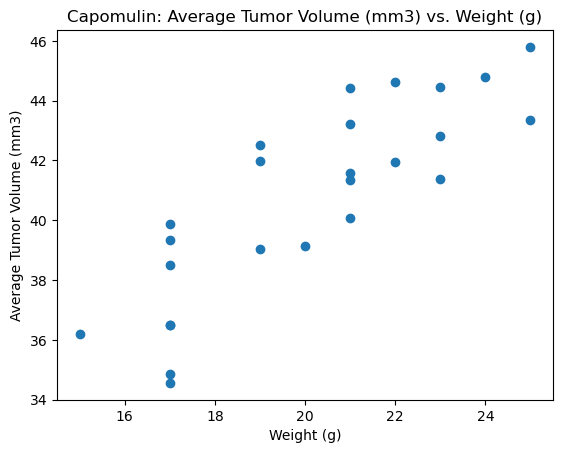

In [37]:
# Filter for Capomulin, group by Mouse ID, Weight and calculate the mean Tumor Volume

capomulin_df = clean_mouse_df.loc[(clean_mouse_df['Drug Regimen'] == 'Capomulin')]
cap_weight_vs_tvolmean = capomulin_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean().to_frame().rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"}).reset_index()
cap_weight_vs_tvolmean

# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

plt.scatter(cap_weight_vs_tvolmean["Weight (g)"], cap_weight_vs_tvolmean["Average Tumor Volume (mm3)"])
plt.title("Capomulin: Average Tumor Volume (mm3) vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


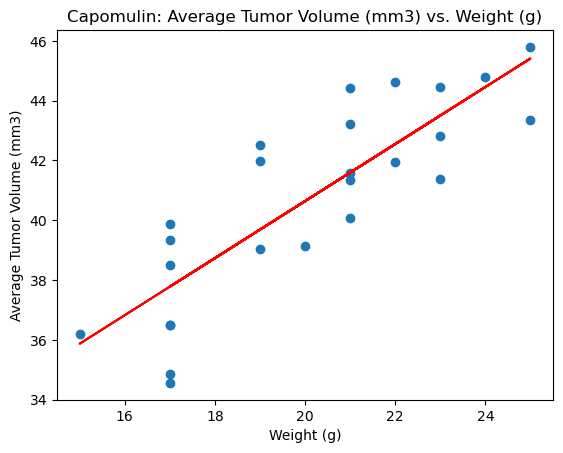

In [38]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept, rval, pval, stderr) = st.linregress(cap_weight_vs_tvolmean["Weight (g)"], cap_weight_vs_tvolmean["Average Tumor Volume (mm3)"])
regress_y = slope * cap_weight_vs_tvolmean["Weight (g)"] + intercept

print(f'The correlation between mouse weight and the average tumor volume is {round(rval, 2)}')

plt.scatter(cap_weight_vs_tvolmean["Weight (g)"], cap_weight_vs_tvolmean["Average Tumor Volume (mm3)"])
plt.plot(cap_weight_vs_tvolmean["Weight (g)"], regress_y, "r")
plt.title("Capomulin: Average Tumor Volume (mm3) vs. Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()